## Create KNN model with unlabeled randomized data

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
df = pd.read_csv("Classified Data", index_col=0)

In [46]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [47]:
scaler = StandardScaler()

In [48]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [49]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [50]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [51]:
df_feat = pd.DataFrame(data=scaled_features, columns=df.columns[:-1])

In [52]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WTT     1000 non-null   float64
 1   PTI     1000 non-null   float64
 2   EQW     1000 non-null   float64
 3   SBI     1000 non-null   float64
 4   LQE     1000 non-null   float64
 5   QWG     1000 non-null   float64
 6   FDJ     1000 non-null   float64
 7   PJF     1000 non-null   float64
 8   HQE     1000 non-null   float64
 9   NXJ     1000 non-null   float64
dtypes: float64(10)
memory usage: 78.2 KB


In [53]:
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

In [54]:
knn = KNeighborsClassifier(n_neighbors=1)

In [55]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [56]:
pred = knn.predict(X_test)

In [57]:
print(confusion_matrix(y_test, pred))

[[129  16]
 [ 14 141]]


In [58]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       145
           1       0.90      0.91      0.90       155

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [59]:
error_rate = []

In [60]:
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
   # print(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

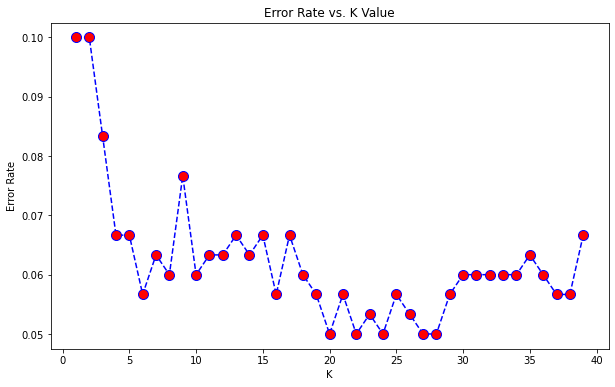

In [68]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Choose Optimal K Value

In [70]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[136   9]
 [  6 149]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95       145
           1       0.94      0.96      0.95       155

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

